# Table of Contents
 <p>

Reference:
https://github.com/sammy-suyama/MLBlog/blob/master/src/demo_simpleVI.jl

In [1]:
using PyPlot

In [2]:
function calc_KL(mu1, lambda1, mu2, lambda2)
    D = size(mu1, 1)
    KL = (1/2) *  ( ( logdet(lambda2) - logdet(lambda1) ) + trace(inv(lambda2)*lambda1) + (mu1-mu2)' * inv(lambda2)*(mu1-mu2) - D )
    return KL[1]
end

calc_KL (generic function with 1 method)

In [3]:
function calc_KLoriginal(mu1, lambda1, mu2, lambda2)
    D = size(mu1, 1)
    px_lnqx = 0.5 * logdet(lambda2) - 0.5 * ((mu1 - mu2)' * lambda2 * (mu1 - mu2) + trace(lambda2 * inv(lambda1)))
    px_lnpx = 0.5 * logdet(lambda1) - 0.5 * D
    KL = - (px_lnqx - px_lnpx)
    return KL[1]
end

calc_KLoriginal (generic function with 1 method)

In [4]:
function plot_results(result, truth)
    N = size(result, 1)
    H = Int(ceil(sqrt(N)))
    W = Int(ceil(N / H))
    f, ax = subplots(H, W)
    for i in 1 : H
        for j in 1 : W
            n = (i - 1) * W + j
            if n <= N
                p = ax[i, j]
                p[:set_title](@sprintf("%d of %d", n, N))
                plot_gaussian(p, result[n][1], result[n][2], "r")
                plot_gaussian(p, truth[1], truth[2], "b")
            end
        end
    end
end

plot_results (generic function with 1 method)

In [5]:
function plot_gaussian(p, Mu, Sigma, col)
    res = 100
    p[:plot](Mu[1], Mu[2], "x", color=col)
    
    F = eigfact(Sigma)
    vec = F[:vectors]
    val = F[:values]
    dw = 2*pi/res
    w = dw * (0 : res)
    
    c = 1.0
    a = sqrt(c * val[1])
    b = sqrt(c * val[2])
    P1 = a*cos(w)
    P2 = b*sin(w)
    P = Mu .+ vec'*vcat(P1', P2')
    p[:plot](P[1, :]', P[2, :]', "-", color=col)
end

plot_gaussian (generic function with 1 method)

In [6]:
## creat truth distribution
D = 2 # dimension
theta = 2.0*pi/12 # tilt
A = reshape([cos(theta), -sin(theta),
             sin(theta), cos(theta)],
            2, 2)
mu = [0.0, 0.0]
lambda = inv(A * inv(reshape([1,0,0,10], 2, 2)) * A')

## initialize
mu_h = randn(D)
lambda_h = zeros(D,D)

## main iteration
max_iter = 16
KL = Vector{Float64}()
result = Vector()
for i in 1 : max_iter
    ## update
    mu_h[1] = mu[1] - inv(lambda[1,1])*lambda[1,2] * (mu_h[2] - mu[2])
    lambda_h[1,1] = lambda[1,1]
    mu_h[2] = mu[2] - inv(lambda[2,2])*lambda[2,1] * (mu_h[1] - mu[1])
    lambda_h[2,2] = lambda[2,2]

    ## calculate KL divergeince
    push!(KL, calc_KL(mu_h, lambda_h, mu, lambda))
    #println(mu_h)
    #println(lambda_h)

    ## store the results
    push!(result, (deepcopy(mu_h), deepcopy(inv(lambda_h))))
end

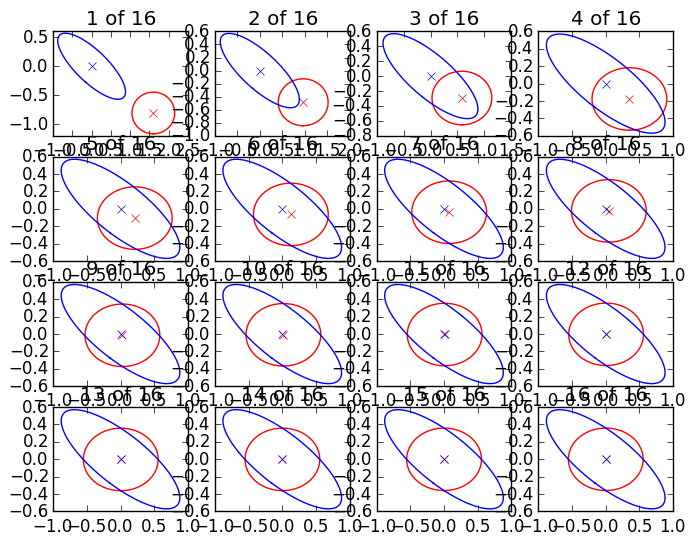

In [7]:
## visualize results
plot_results(result, (mu, inv(lambda)))

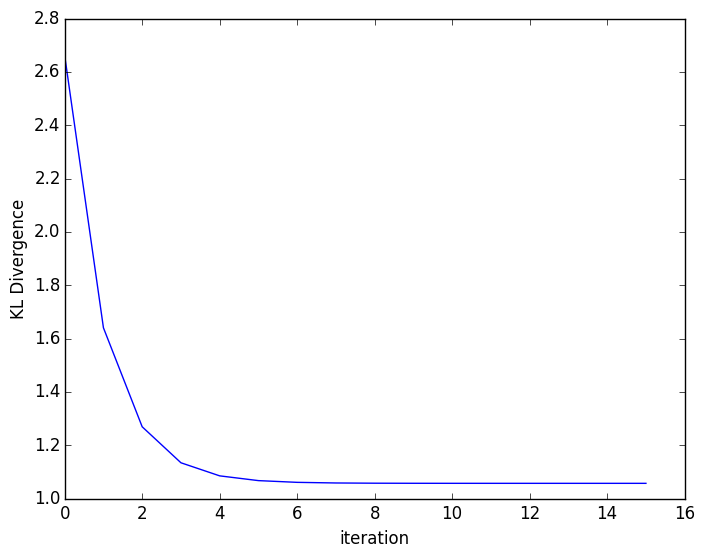

PyObject <matplotlib.text.Text object at 0x31d7d1690>

In [8]:
plot(KL)
xlabel("iteration")
ylabel("KL Divergence")